<a href="https://colab.research.google.com/github/Rogerod23/Rogelio/blob/main/fig10_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

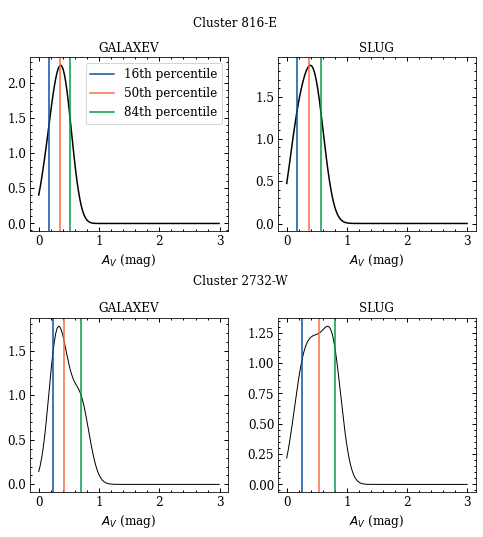

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
### THIS NOTEBOOK ONLY PLOTS CLUSTERS 2732 and 816.

#############################
#### LOAD DATA   ############
#############################
PDF = pd.read_csv("https://raw.githubusercontent.com/aida-wofford/Rogelio/main/PDF.csv")
percentiles = pd.read_csv("https://raw.githubusercontent.com/aida-wofford/Rogelio/main/AV_percentiles.csv")

del PDF["Unnamed: 0"]
del percentiles["Unnamed: 0"]
cluster_id = ["2723", "816"]

PDF_columns = PDF.columns
percentiles_columns = percentiles.columns

#PDF COLUMN INFO TO SEE WHAT PLOT YOU WANT TO SEE
#print(percentiles_columns)
#print(PDF_columns)

#########################################################
# Colors 
#########################################################

alpha=1
blue=(7/255,80/255,155/255,alpha)
lblue=(106/255,175/255,210/255,alpha)
pistache=(190/255,250/255,215/255,alpha)
yellow=(248/255,250/255,3/255,alpha)
red=(251/255,105/255,73/255,alpha)
wine=(160/255,55/255,98/255,alpha)
dgreen=(5/255,149/255,74/255,alpha)
gray=(203/255,202/255,201/255,alpha)
black = (0,0,0,1)

mycolor=[blue,red,dgreen]

#########################################################
# Font parameters 
#########################################################
fontsize=12
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : fontsize}
plt.rc('font', **font)

mycolor=[blue,red,dgreen]

mark = "None"
lw_ = 1.5
linestyle_ = "-"

#Figure size and subplots
fig, axes = plt.subplots(2,2,figsize=(8,8))
((ax1,ax2),(ax2,ax3)) = axes
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)
code=['GALAXEV','SLUG']

for icluster in range(2):
    for icode in range(2):
        axes[icluster][icode].set_ylabel('')
        axes[icluster][icode].minorticks_on() #...add minor ticks to x and y axes
        axes[icluster][icode].tick_params(which='minor', length = 2, width = 1, #...format minor ticks
                                       direction = 'in', top = True, right = True)
        axes[icluster][icode].tick_params(which='major', length = 4, width = 1, #...format minor ticks  
                                          direction = 'in', top = True, right = True)
        if icode==0 and icluster == 0:
            axes[icluster][icode].annotate('Cluster 816-E', 
                                           xy = (0.4,0.95), xytext = (0.4,0.95), 
                                           xycoords='figure fraction', size = 12)
        if icode==0 and icluster == 1:
            axes[icluster][icode].annotate('Cluster 2732-W', 
                                           xy = (0.4,0.47), xytext = (0.4,0.47), 
                                           xycoords='figure fraction', size = 12)            
        axes[icluster][icode].set_xlabel('$A_V$ (mag)')
        axes[icluster][icode].set_title(code[icode],fontsize=12)

axes[0][0].plot(PDF.loc[:, PDF_columns[0]], PDF.loc[:, PDF_columns[5]], color = black, marker = mark, 
         markevery= 10, linestyle = linestyle_, lw=lw_)

axes[0][1].plot(PDF.loc[:, PDF_columns[2]], PDF.loc[:, PDF_columns[7]], color = black, marker = mark, 
         markevery= 10, linestyle = linestyle_, lw=lw_)

axes[0][0].axvline(percentiles.loc[0, percentiles_columns[6]], 
                   color =mycolor[0], linestyle = '-', linewidth = lw_,label='16th percentile')
axes[0][0].axvline(percentiles.loc[0, percentiles_columns[7]], color =mycolor[1],
                   linestyle =  '-', linewidth = lw_,label='50th percentile')
axes[0][0].axvline(percentiles.loc[0, percentiles_columns[8]], color =mycolor[2],
                   linestyle =  '-', linewidth = lw_,label='84th percentile')
axes[0][0].legend()

axes[0][1].axvline(percentiles.loc[0, percentiles_columns[9]], color =mycolor[0], linestyle = '-', linewidth = lw_)
axes[0][1].axvline(percentiles.loc[0, percentiles_columns[10]], color =mycolor[1], linestyle = '-', linewidth = lw_)
axes[0][1].axvline(percentiles.loc[0, percentiles_columns[11]], color =mycolor[2], linestyle =  '-', linewidth = lw_)

axes[1][0].plot(PDF.loc[:, PDF_columns[0]], PDF.loc[:, PDF_columns[1]], color = black, 
                marker = mark, markevery= 10, linestyle = linestyle_
                 , lw=1)
axes[1][1].plot(PDF.loc[:, PDF_columns[2]], PDF.loc[:, PDF_columns[3]], color = black, 
         marker = mark, markevery= 10, linestyle = linestyle_
                 , lw=1)

axes[1][0].axvline(percentiles.loc[0, percentiles_columns[0]], color =mycolor[0], linestyle = '-', linewidth = lw_)
axes[1][0].axvline(percentiles.loc[0, percentiles_columns[1]], color =mycolor[1], linestyle =  '-', linewidth = lw_)
axes[1][0].axvline(percentiles.loc[0, percentiles_columns[2]], color =mycolor[2], linestyle =  '-', linewidth = lw_)


axes[1][1].axvline(percentiles.loc[0, percentiles_columns[3]], color =mycolor[0], linestyle = '-', linewidth = lw_)
axes[1][1].axvline(percentiles.loc[0, percentiles_columns[4]], color = mycolor[1], linestyle = '-', linewidth = lw_)
axes[1][1].axvline(percentiles.loc[0, percentiles_columns[5]], color = mycolor[2], linestyle =  '-', linewidth = lw_)
                                       
plt.savefig("fig10_av_pdf.png", bbox_inches = 'tight',dpi=100)
plt.show()

#PABLO